# environment

In [ ]:
!pip install dccp

In [ ]:
from cvxpy import *

import dccp
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab
import random

!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# non-overlapping

## Two-dimensional

In [ ]:
n = 10
r = np.linspace(1, 5, n)
c = Variable((n, 2))
constraints = []

for i in range(n - 1):
    for j in range(i + 1, n):
        constraints.append(norm(c[i, :] - c[j, :]) >= r[i] + r[j])
# print(constraints)

myproblem = Problem(Minimize(max(max(abs(c), axis = 1) + r)), constraints)
myproblem.solve(method = "dccp", ccp_times = 1)
print(myproblem.status)

Converged


In [ ]:
l = max(max(abs(c), axis = 1) + r).value * 2
pi = np.pi
ratio = pi * sum(square(r)).value / square(l).value
print(ratio)

0.7234315786167875


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


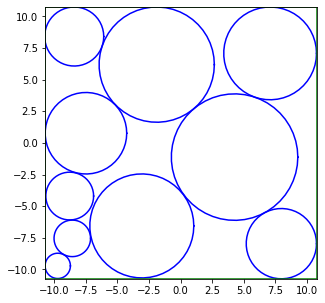

In [ ]:
plt.figure(figsize = (5, 5))
circ = np.linspace(0, 2 * pi)
x_border = [-l/2, l/2, l/2, -l/2, -l/2]
y_border = [-l/2, -l/2, l/2, l/2, -l/2]

for i in range(n):
    plt.plot(c[i, 0].value + r[i] * np.cos(circ), c[i, 1].value + r[i] * np.sin(circ), "b")
plt.plot(x_border, y_border, "g")
plt.axes().set_aspect("equal")
plt.xlim([-l/2, l/2])
plt.ylim([-l/2, l/2])
plt.show()

### equal-sized

In [ ]:
n = 10
r = [1 for i in range(n)]
c = Variable((n, 2))
constraints = []

for i in range(n - 1):
    for j in range(i + 1, n):
        constraints.append(norm(c[i, :] - c[j, :]) >= r[i] + r[j])
# print(constraints)

myproblem = Problem(Minimize(max(max(abs(c), axis = 1) + r)), constraints)
myproblem.solve(method = "dccp", ccp_times = 1)
print(myproblem.status)

Converged


In [ ]:
l = max(max(abs(c), axis = 1) + r).value * 2
pi = np.pi
ratio = pi * sum(square(r)).value / square(l).value
print(ratio)

0.6900381811517349


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


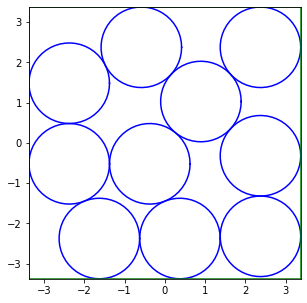

In [ ]:
plt.figure(figsize = (5, 5))
circ = np.linspace(0, 2 * pi)
x_border = [-l/2, l/2, l/2, -l/2, -l/2]
y_border = [-l/2, -l/2, l/2, l/2, -l/2]

for i in range(n):
    plt.plot(c[i, 0].value + r[i] * np.cos(circ), c[i, 1].value + r[i] * np.sin(circ), "b")
plt.plot(x_border, y_border, "g")
plt.axes().set_aspect("equal")
plt.xlim([-l/2, l/2])
plt.ylim([-l/2, l/2])
plt.show()

## Three-dimensional